# ASTR 426 Project Code
### Lily Wood

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import h5netcdf 
from netCDF4 import Dataset
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from scipy.stats import norm

# Read in the e_Callisto data
df = pd.read_csv('e-CALLISTO_2024_01.txt', delimiter='\t', comment='#', 
                 header=None)

df.columns = ['Date', 'Time', 'Type', 'Stations']
df = df.dropna()

print(df.head())

       Date         Time Type                          Stations
0  20240101  18:02-18:02  III  MEXICO-LANCE, (USA-ARIZONA-ERAU)
1  20240101  22:51-22:55  CTM                    Australia-ASSA
2  20240101  23:20-23:21  III                    Australia-ASSA
3  20240102  02:48-02:48  III                    Australia-ASSA
4  20240102  08:01-08:04  III              HUMAIN, (INDIA-OOTY)


In [2]:
# Only show where 'Type' is 'III'
df = df[df['Type'] == 'III']

print(df)

# I found it easier to go on the e-Callisto website to compare radio flares to the solar flare data I displayed below.
# The e-Callisto data can be found at:
# https://soleil.i4ds.ch/solarradio/data/BurstLists/2010-yyyy_Monstein/2024/

         Date         Time Type  \
0    20240101  18:02-18:02  III   
2    20240101  23:20-23:21  III   
3    20240102  02:48-02:48  III   
4    20240102  08:01-08:04  III   
5    20240102  09:01-09:02  III   
..        ...          ...  ...   
244  20240131  14:34-14:35  III   
245  20240131  15:27-15:28  III   
246  20240131  16:17-16:20  III   
247  20240131  20:24-20:25  III   
248  20240131  21:45-21:47  III   

                                              Stations  
0                     MEXICO-LANCE, (USA-ARIZONA-ERAU)  
2                                       Australia-ASSA  
3                                       Australia-ASSA  
4                                 HUMAIN, (INDIA-OOTY)  
5                      HUMAIN, INDIA-GAURI, INDIA-OOTY  
..                                                 ...  
244  AUSTRIA-UNIGRAZ, (BIR), GERMANY-DLR, GLASGOW, ...  
245  AUSTRIA-UNIGRAZ, BIR, GERMANY-DLR, GLASGOW, GR...  
246  GLASGOW, GREENLAND, [HUMAIN], (MEXART), MEXICO...  
247      

In [3]:
# Read in GOES 16 X-Ray solar flare files for February. I did the same thing for January but changed the file names after
# I was done with the month. That's why they show February dates.
# The data can be downloaded at:
# https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes16/l2/data/xrsf-l2-avg1m_science/2024/

flsum1 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240201_v2-2-0.nc')
flsum2 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240202_v2-2-0.nc')
flsum3 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240203_v2-2-0.nc')
flsum4 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240204_v2-2-0.nc')
flsum5 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240205_v2-2-0.nc')
flsum6 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240206_v2-2-0.nc')
flsum7 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240207_v2-2-0.nc')
flsum8 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240208_v2-2-0.nc')
flsum9 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240209_v2-2-0.nc')
flsum10 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240210_v2-2-0.nc')
flsum11 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240211_v2-2-0.nc')
flsum12 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240212_v2-2-0.nc')
flsum13 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240213_v2-2-0.nc')
flsum14 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240214_v2-2-0.nc')
flsum15 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240215_v2-2-0.nc')
flsum16 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240216_v2-2-0.nc')
flsum17 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240217_v2-2-0.nc')
flsum18 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240218_v2-2-0.nc')
flsum19 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240219_v2-2-0.nc')
flsum20 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240220_v2-2-0.nc')
flsum21 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240221_v2-2-0.nc')
flsum22 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240222_v2-2-0.nc')
flsum23 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240223_v2-2-0.nc')
flsum24 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240224_v2-2-0.nc')
flsum25 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240225_v2-2-0.nc')
flsum26 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240226_v2-2-0.nc')
flsum27 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240227_v2-2-0.nc')
flsum28 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240228_v2-2-0.nc')
flsum29 = xr.open_dataset('sci_xrsf-l2-flsum_g16_d20240229_v2-2-0.nc')


# Only show solar flare start and end times
def flsum(flsum_num):
    flsum_num = flsum_num.to_dataframe().reset_index()
    
    # Calculate Julian Date
    flsum_num['JD'] = flsum_num['time'].apply(lambda ts: 
             np.round(pd.Timestamp(ts).to_julian_date(), 1))
    
    # Save only event starts and ends
    flsum_num = flsum_num[(flsum_num['status'] == 'EVENT_START') |
    (flsum_num['status'] == 'EVENT_END')]
    return flsum_num

flsum1 = flsum(flsum1)
flsum2 = flsum(flsum2)
flsum3 = flsum(flsum3)
flsum4 = flsum(flsum4)
flsum5 = flsum(flsum5)
flsum6 = flsum(flsum6)
flsum7 = flsum(flsum7)
flsum8 = flsum(flsum8)
flsum9 = flsum(flsum9)
flsum10 = flsum(flsum10)
flsum11 = flsum(flsum11)
flsum12 = flsum(flsum12)
flsum13 = flsum(flsum13)
flsum14 = flsum(flsum14)
flsum15 = flsum(flsum15)
flsum16 = flsum(flsum16)
flsum17 = flsum(flsum17)
flsum18 = flsum(flsum18)
flsum19 = flsum(flsum19)
flsum20 = flsum(flsum20)
flsum21 = flsum(flsum21)
flsum22 = flsum(flsum22)
flsum23 = flsum(flsum23)
flsum24 = flsum(flsum24)
flsum25 = flsum(flsum25)
flsum26 = flsum(flsum26)
flsum27 = flsum(flsum27)
flsum28 = flsum(flsum28)
flsum29 = flsum(flsum29)

In [4]:
# An example X-ray solar flare dataframe. This one is for February 21st.
flsum21

,time,xrsb_flux,status,background_flux,flare_class,integrated_flux,flare_id,JD
0,2024-02-21 00:32:00,0.000001,EVENT_START,1.419743e-06,NaN,0.000790,2.024022e+11,2460361.5
2,2024-02-21 00:41:00,0.000002,EVENT_END,1.419743e-06,NaN,0.001102,2.024022e+11,2460361.5
3,2024-02-21 00:44:00,0.000001,EVENT_START,1.475682e-06,NaN,0.000768,2.024022e+11,2460361.5
5,2024-02-21 01:16:00,0.000002,EVENT_END,1.475682e-06,NaN,0.005006,2.024022e+11,2460361.6
7,2024-02-21 01:55:00,0.000001,EVENT_START,1.360939e-06,NaN,0.000884,2.024022e+11,2460361.6
9,2024-02-21 02:42:00,0.000003,EVENT_END,1.360939e-06,NaN,0.009339,2.024022e+11,2460361.6
10,2024-02-21 03:38:00,0.000001,EVENT_START,1.428173e-06,NaN,0.000924,2.024022e+11,2460361.7
12,2024-02-21 04:35:00,0.000002,EVENT_END,1.428173e-06,NaN,0.007479,2.024022e+11,2460361.7
14,2024-02-21 07:31:00,0.000001,EVENT_START,9.843517e-07,NaN,0.000493,2.024022e+11,2460361.8
16,2024-02-21 07:39:00,0.000001,EVENT_END,9.843517e-07,NaN,0.000727,2.024022e+11,2460361.8


In [5]:
# I made this to mark which radio bursts occured during solar flares 
# and their timing differences.
# 
#  (Date)      (Time)  (Type) (xray event first is positive) Difference (min):
# 20240102  10:21-10:22 III  -1
# 20240102	18:36-18:36	III	 34
# 20240104	00:47-00:59	VI   34
# 20240104	09:25-09:25	III  9
# 20240104	17:23-17:59	VI   3
# 20240105	00:25-00:48	VI   2
# 20240106	05:43-05:58	VI   2
# 20240106	19:32-19:36	III  5
# 20240107	04:13-04:14	RBR  2
# 20240107	10:23-10:33	VI   14
# 20240108	15:12-15:18	III  1
# 20240110	03:24-03:25	III  6
# 20240110	04:24-04:36	VI   5
# 20240110	06:45-07:08	VI   -3
# 20240110	09:05-09:06	III  9
# 20240110	12:44-12:45	III  5
# 20240110	18:58-19:05	III  2
# 20240110	21:55-21:56	III  2
# 20240110	23:31-23:35	III  13
# 20240112	02:57-02:57	III  2
# 20240112	11:33-11:39	III  3
# 20240112	17:36-17:36	RBR  35
# 20240113	23:22-23:22	III  0
# 20240114	11:46-11:50	II   16
# 20240114	12:10-12:11	III  40
# 20240120	02:39-02:58	VI   -12
# 20240120	08:52-08:52	III  17
# 20240121	00:06-00:07	III  3
# 20240121	00:35-03:01	VI   0
# 20240122	01:38-01:38	III  4
# 20240122	06:07-06:19	VI   -2
# 20240123	00:04-00:15	VI   -8
# 20240123	03:18-03:43	VI   9
# 20240123	07:52-07:54	III  0
# 20240123	09:34-09:36	III  17
# 20240123	13:03-13:06	III  0
# 20240123	16:22-16:26	III  8
# 20240124	06:56-06:58	III  27
# 20240128	12:51-12:51	III  14
# 20240128	16:04-16:07	III  12
# 20240129	01:30-01:38	III  1
# 20240129	10:10-10:10	III  0
# 20240129	11:39-11:42	III  0
# 20240130	00:09-00:21	VI   2
# 20240130	06:18-06:26	III  0
# 20240130	06:30-06:44	VI   -3
# 20240130	17:18-17:19	III  3
# 20240130	23:04-23:11	III  4
# 20240131	05:16-05:25	III  -3
# 20240131	20:24-20:25	III  2
# 20240201	06:08-06:11	III  2
# 20240201	14:58-15:01	III  1
# 20240201	21:00-21:05	III  3
# 20240201	23:06-23:24	VI   -5
# 20240202	02:49-03:02	VI   -3
# 20240202	05:21-05:39	VI   1
# 20240202	10:53-10:57	III	 5
# 20240202	16:30-16:42	VI   8
# 20240202	19:16-19:28	VI   0
# 20240203	05:47-05:54	III  16
# 20240204	15:15-15:17	III  7
# 20240205	03:32-03:32	III  17
# 20240205	06:20-06:20	III	 10
# 20240205	21:45-21:56	VI   -3
# 20240206	02:16-03:50	VI   1
# 20240207	13:17-13:17	III  0
# 20240208	04:09-04:11	III  2
# 20240208	14:15-14:21	III  4
# 20240208	15:32-15:32	III  5
# 20240208	18:01-18:02	III  5
# 20240209	13:03-13:08	III  10
# 20240210	22:56-22:57	III  0
# 20240211	08:49-08:51	III  13
# 20240211	13:55-13:56	III  -1
# 20240212	01:54-01:55	III  9
# 20240212	12:34-12:34	III  0
# 20240213	07:39-07:58	VI   11
# 20240214	09:59-10:27	VI   5
# 20240214	14:51-14:52	III  3
# 20240214	20:20-20:23	III  0
# 20240215	02:28-02:29	III  2
# 20240215	05:30-05:46	VI   1
# 20240216	06:47-07:03	VI   5
# 20240216	18:46-18:46	III  5
# 20240217	03:23-03:25	III  4
# 20240218	12:04-12:04	III  5
# 20240221	02:00-02:03	III  5
# 20240221	14:19-14:19	III  5
# 20240221	19:28-19:29	III  6
# 20240221	20:33-20:34	III  1
# 20240221	22:40-22:40	III  2
# 20240222	16:34-16:40	III  17
# 20240222	17:10-17:10	III  2
# 20240222	17:15-17:16	III  7
# 20240223	23:11-23:13	III  5
# 20240224	14:35-14:36	III  0
# 20240224	16:46-16:47	III  6
# 20240228	05:50-06:07	VI   5
# 20240228	07:15-07:19	III  11

In [6]:
# I manually counted the Type III bursts from above and added them to these arrays:
x1=[-3,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,27,34,40] # Values
y1=[1,2,11,4,9,5,4,10,3,2,1,2,3,1,1,2,1,2,4,1,1,1] # Counts

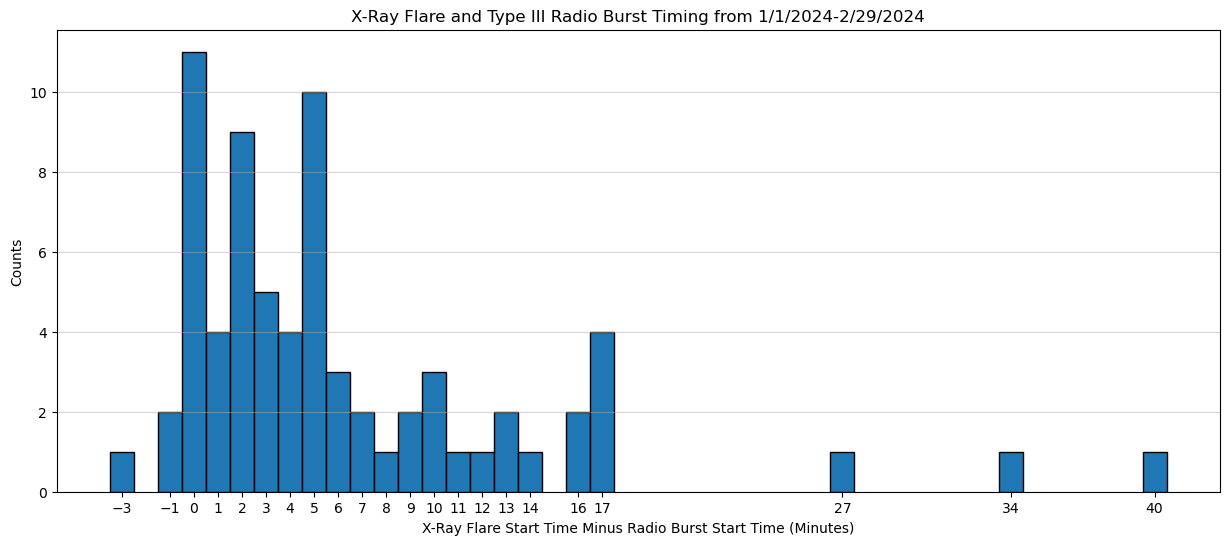

Mean: 6.34, Standard Deviation: 7.73


In [7]:
# This is a histogram representing X-Ray Flare and Type III Radio Burst timing from 1/1/2024-2/29/2024
# Calculate mean, standard deviation, and error
mean = np.average(x1, weights=y1)
std_dev = np.sqrt(np.average((x1 - mean)**2, weights=y1))

# Create the 
plt.figure(figsize=(15, 6))
plt.bar(x1, y1, width=1, edgecolor='black')
plt.xlabel('X-Ray Flare Start Time Minus Radio Burst Start Time (Minutes)')
plt.ylabel('Counts')
plt.title('X-Ray Flare and Type III Radio Burst Timing from 1/1/2024-2/29/2024')
plt.xticks(x1)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Print mean and standard deviation
print(f'Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}')

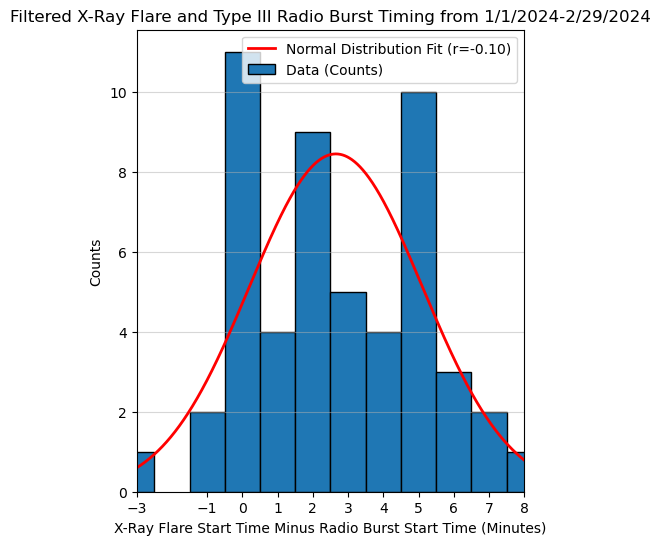

Mean: 2.65, Fit Standard Deviation: 2.46


In [8]:
# Filter the data to exclude x-values values beyond 8
x1 = np.array(x1)
y1 = np.array(y1)

x1_filtered = x1[x1 <= 8]
y1_filtered = [y for i, y in enumerate(y1) if x1[i] <= 8] 

# Calculate mean and standard deviation for the filtered data
mean = np.sum(np.multiply(x1_filtered, y1_filtered))/np.sum(y1_filtered)
std_dev = np.sqrt(np.average((x1_filtered - mean)**2, weights=y1_filtered))

# Calculate the Pearson correlation coefficient
corr_coef = np.corrcoef(x1_filtered, y1_filtered)[0, 1]

# Generate a normal distribution using the mean and standard deviation of filtered data
x_values = np.linspace(min(x1_filtered), max(x1_filtered), 1000)
y_values = norm.pdf(x_values, mean, std_dev)

# Plot the histogram
plt.figure(figsize=(5, 6))
plt.xlim(-3, 8)
plt.bar(x1_filtered, y1_filtered, width=1, align='center', label='Data (Counts)', edgecolor='black')

# Plot the normal distribution curve for the filtered data
plt.plot(x_values, y_values * np.sum(y1_filtered), label='Normal Distribution Fit', color='red', lw=2)

# Plot labels and title
plt.xlabel('X-Ray Flare Start Time Minus Radio Burst Start Time (Minutes)')
plt.ylabel('Counts')
plt.title('Filtered X-Ray Flare and Type III Radio Burst Timing from 1/1/2024-2/29/2024')

# Plot tick marks
plt.xticks(x1_filtered)  # Use the filtered x3 values for tick marks
plt.grid(axis='y', alpha=0.5)

# Add Pearson Correlation Coefficient to legend
plt.legend(labels=[f'Normal Distribution Fit (r={corr_coef:.2f})', 'Data (Counts)'])
plt.show()

# Print mean and standard deviation for the filtered data
print(f'Mean: {mean:.2f}, Fit Standard Deviation: {std_dev:.2f}')


In [9]:
# Display some of the X-Ray data with netcdf4 to see some dataset info, like wavelength
flsum_data = Dataset('sci_xrsf-l2-flsum_g16_d20240201_v2-2-0.nc')
flsum_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: ACDD-1.3, Spase v2.2.6
    title: L2 XRS flare detection summary
    summary: The EXIS X-Ray Sensor (XRS) measures in a short wavelength channel (XRS-A) between 0.05 and 0.4 nm and in a longer wavelength channel (XRS-B) between 0.1 and 0.8 nm. The product consists of 1 event status flag for the XRS-B channel derived from the 1 minute average fluxes as well as auxiliary data. A product is produced for four key flare events: start, peak, end, and post event.  The corresponding auxiliary data is pre-flare flux background (W/m2) for event start, flare type (e.g., B5.2) for event peak, and integrated flux (W/m2) for flare end. There is no auxiliary data for post event status. 
    keywords: NumericalData.MeasurementType.Irradiance
    keywords_vocabulary: SPASE: Space Physics Archive Search and Extract Data Model version 2.2.6, GCMD: NASA Global Change Master Directory (GCMD) Earth Science

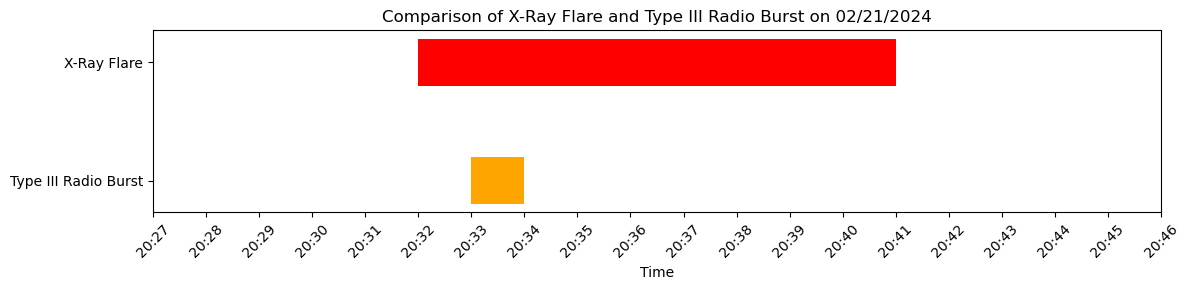

In [10]:
# This is an example of an overlapping X-ray flare and radio burst in time (02/21/2024)
# Define the time ranges for the events in (month, year, date, hour, minute)
radio_burst_start = datetime(2024, 2, 21, 20, 33)
radio_burst_end = datetime(2024, 2, 21, 20, 34)

solar_flare_start = datetime(2024, 2, 21, 20, 32)
solar_flare_end = datetime(2024, 2, 21, 20, 41)

# Add extra time before and after the solar flare to make it look nicer
extra_time = timedelta(minutes=5)
extended_solar_flare_start = solar_flare_start - extra_time
extended_solar_flare_end = solar_flare_end + extra_time

# Convert start and end times to matplotlib date numbers
radio_burst_start_num = mdates.date2num(radio_burst_start)
radio_burst_end_num = mdates.date2num(radio_burst_end)

solar_flare_start_num = mdates.date2num(solar_flare_start)
solar_flare_end_num = mdates.date2num(solar_flare_end)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 3))

# Plot the Type III radio burst
ax.barh('Type III Radio Burst', radio_burst_end_num - radio_burst_start_num, 
        left=radio_burst_start_num, height=0.4, color='orange')

# Plot the X-Ray Flare 
ax.barh('X-Ray Flare', solar_flare_end_num - solar_flare_start_num, 
        left=solar_flare_start_num, height=0.4, color='red')

# Show time in hours and minutes on x-axis
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.set_xlim([mdates.date2num(extended_solar_flare_start), mdates.date2num(extended_solar_flare_end)])
ax.set_xlabel('Time')
ax.set_title('Comparison of X-Ray Flare and Type III Radio Burst on 02/21/2024')

# Rotate labels
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()